### The Client



XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

#### Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

#### Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

- Review the Source Documentation  
- Understand the field names and data types  
- Identify relationships across the files  
- Field/feature transformations  
- Determine which files should be joined versus which ones should be appended  
- Create master data and explain the relationship  
- Identify and remove duplicates  
- Perform other analysis like NA value and outlier detection  
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

#### Analysis  

Create multiple hypothesis and investigate:

**You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.**  

For Example: “Is there any seasonality in number of customers using the cab service?”

#### Areas to investigate:

- Which company has maximum cab users at a particular time period?  
- Does margin proportionally increase with increase in number of customers?  
- What are the attributes of these customer segments?  

**Although not required, we encourage you to document the process and findings**  
- What is the business problem?  
- What are the properties of the data provided (data intake report)  
- What steps did you take in order to create an applicable data set?  
- How did you prepare and perform your analysis?  
- What type of analysis did you perform?  
- Why did you choose to use certain analytical techniques over others?  
- What were the results?  
- Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

#### Deliverables of Week 2 are:

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document) 

You can use either EDA or Modeling and EDA both to deliver the result.

Remember, there are no wrong answers as long as the data supports them.

Note: Sample presentation of previous batch intern, for your reference is added

### EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [2]:
#SNS plot colors
pink_color = sns.color_palette("Set2")[3]
yellow_color = sns.color_palette("Set2")[5]

#### Data Fields

<img src="ERD.png" alt="Drawing" style="width: 500px;"/>

In [3]:
# Load in data
transaction_df = pd.read_csv('data/Transaction_ID.csv')
city_df = pd.read_csv('data/City.csv', thousands=',') # thousands=',' is used to remove the comma in the population column
cab_df = pd.read_csv('data/Cab_Data.csv')
customer_df = pd.read_csv('data/Customer_ID.csv')

#### Null Values: None

In [4]:
transaction_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [5]:
city_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [6]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [7]:
customer_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

#### Transaction_ID.csv

In [8]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
# fix column names for easier reference
transaction_df.rename({'Transaction ID': 'transaction_id', 'Customer ID': 'customer_id', 'Payment_Mode': 'payment_mode'}, axis='columns', inplace=True)

In [10]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  440098 non-null  int64 
 1   customer_id     440098 non-null  int64 
 2   payment_mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


***Observations:***  
transaction and customer ID columns are categorical - switch to object

In [11]:
transaction_df = transaction_df.astype({"transaction_id": object, "customer_id": object})

In [12]:
transaction_df.payment_mode.value_counts(normalize=True)*100

Card    59.984594
Cash    40.015406
Name: payment_mode, dtype: float64

In [13]:
transaction_df.customer_id.value_counts(normalize=True).sort_values(ascending=False).head()

494     0.000123
2939    0.000120
1070    0.000116
2766    0.000116
1628    0.000114
Name: customer_id, dtype: float64

No anomolous users.

#### city_data.csv

In [14]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [15]:
# fix column names for easier reference
city_df.rename({'City': 'city', 'Population': 'population', 'Users': 'users'}, axis='columns', inplace=True)

In [16]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        20 non-null     object
 1   population  20 non-null     int64 
 2   users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [17]:
city_df.sort_values(by='population', ascending=False).head()

,city,population,users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


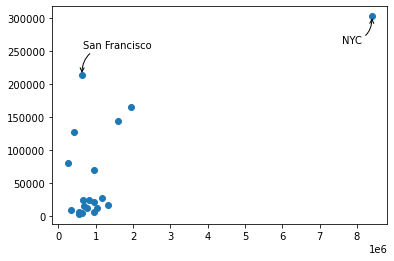

In [18]:
fig, ax = plt.subplots()
ax.scatter(x='population', y='users', data = city_df)

# label NEW YORK NY
city = "NYC"
x = city_df.population[city_df.city=='NEW YORK NY']
y = city_df.users[city_df.city=='NEW YORK NY']
ax.annotate(city, (x, y), xytext=(x-800000, y-40000), 
    arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))

# label San francisco
city = "San Francisco"
x = city_df.population[city_df.city=='SAN FRANCISCO CA']
y = city_df.users[city_df.city=='SAN FRANCISCO CA']

ax.annotate(city, (x, y), xytext=(x+40000, y+40000), 
    arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"));

New York City has the highest population and user count, but San Francisco has one of the lowest populations with the 2nd greatest user count.

In [19]:
city_df['user_rate'] = city_df.users/city_df.population
city_df['user_rate'].head()

0    0.035945
1    0.084121
2    0.090363
3    0.013199
4    0.023138
Name: user_rate, dtype: float64

#### cab_data.csv

In [20]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [21]:
# fix column names for easier reference
cab_df.rename({'Transaction ID': 'transaction_id', 'Date of Travel': 'date', 'Company': 'company', 
    'City': 'city', 'KM Travelled': 'km_traveled', 'Price Charged': 'price', 'Cost of Trip': 'expense'}, axis='columns', inplace=True)

In [22]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  359392 non-null  int64  
 1   date            359392 non-null  int64  
 2   company         359392 non-null  object 
 3   city            359392 non-null  object 
 4   km_traveled     359392 non-null  float64
 5   price           359392 non-null  float64
 6   expense         359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [23]:
cab_df.describe()

,transaction_id,date,km_traveled,price,expense
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


Following along the rows, it does not appear to be a linear relationship across all the variables.  Let's dig in

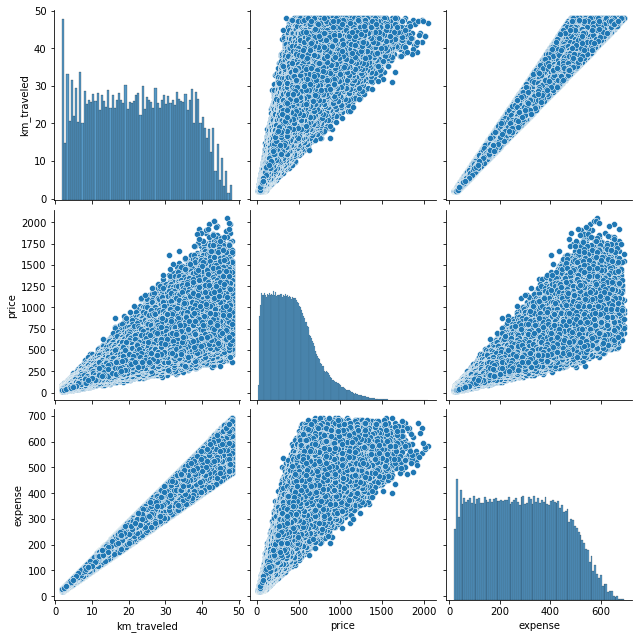

In [80]:
sns.pairplot(cab_df[['km_traveled', 'price', 'expense']], height=3);


***Observations:***  
- transaction ID should be object
- date columns are not date type; need to be converted form excel format
- There is a price and cost column.  My **assumption** is that price is income, cost is expense.  Need to create a profit column (rename columns appropriately) 

In [25]:
cab_df = cab_df.astype({"transaction_id": object})

In [26]:
cab_df['profit'] = cab_df.price - cab_df.expense

In [27]:
# convert date from excel date format
cab_df['date'] = pd.to_datetime(cab_df['date'], unit='D', origin='1899-12-30')

##### Check the date range

In [28]:
cab_df['date'].min()

Timestamp('2016-01-02 00:00:00')

In [29]:
cab_df['date'].max()

Timestamp('2018-12-31 00:00:00')

##### Analyze the money

In [30]:
cab_df.corr()

,km_traveled,price,expense,profit
km_traveled,1.000000,0.835753,0.981848,0.462768
price,0.835753,1.000000,0.859812,0.864154
expense,0.981848,0.859812,1.000000,0.486056
profit,0.462768,0.864154,0.486056,1.000000


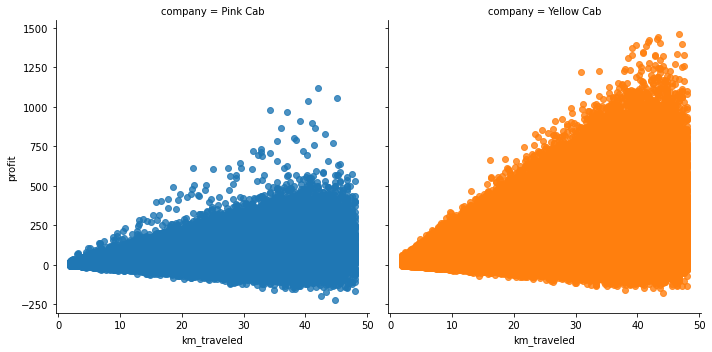

In [31]:
sns.lmplot( x="km_traveled", y="profit", data=cab_df, fit_reg=False, col='company', hue='company', legend=False);

##### Analyze the companies

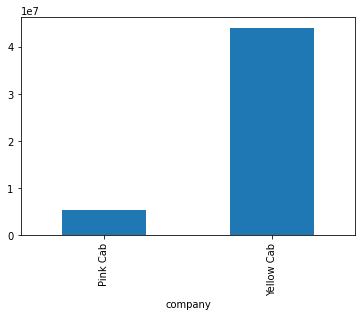

In [32]:
cab_df.groupby('company').profit.sum().plot(kind='bar');

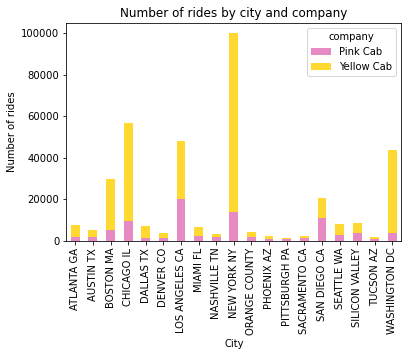

In [33]:
cab_df.groupby('city')['company'].value_counts().unstack().plot(kind='bar', stacked=True, color=[pink_color, yellow_color], 
                                                                xlabel='City', ylabel='Number of rides', title='Number of rides by city and company');

#### customer_data.csv

In [34]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [35]:
# fix column names for easier reference
customer_df.rename({'Customer ID': 'customer_id', 'Gender': 'gender', 'Age': 'age', 'Income (USD/Month)': 'income'}, axis='columns', inplace=True)

In [36]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  49171 non-null  int64 
 1   gender       49171 non-null  object
 2   age          49171 non-null  int64 
 3   income       49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


***Observations:***  
- transaction ID should be object
- date columns are not date type; need to be converted form excel format


In [37]:
customer_df = customer_df.astype({"customer_id": object})

In [38]:
# Check for duplicate customer ids
customer_df.customer_id.duplicated().sum()

0

In [39]:
customer_df.gender.value_counts(normalize=True)*100

Male      54.019646
Female    45.980354
Name: gender, dtype: float64

In [40]:
customer_df.age.describe()

count    49171.000000
mean        35.363121
std         12.599066
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64

<AxesSubplot:>

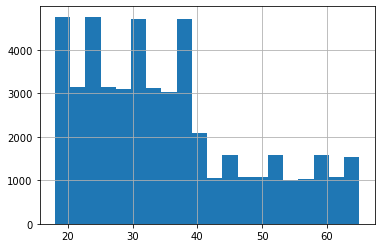

In [41]:
customer_df.age.hist(bins=20)          

In [42]:
customer_df.income.describe()

count    49171.000000
mean     15015.631856
std       8002.208253
min       2000.000000
25%       8289.500000
50%      14656.000000
75%      21035.000000
max      35000.000000
Name: income, dtype: float64

<AxesSubplot:>

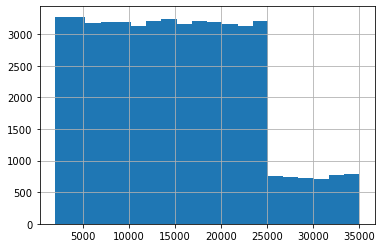

In [43]:
customer_df.income.hist(bins=20)          

,age,income
age,1.000000,0.000156
income,0.000156,1.000000


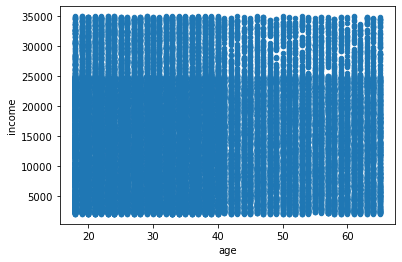

In [44]:
customer_df.plot(kind='scatter', x='age', y='income')
customer_df.corr()

### Merge Datasets

In [45]:
df = cab_df.merge(transaction_df, on= 'transaction_id').merge(customer_df, on ='customer_id').merge(city_df, on = 'city')
df.head()

,transaction_id,date,company,city,km_traveled,price,expense,profit,customer_id,payment_mode,gender,age,income,population,users,user_rate
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701,0.030312
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701,0.030312
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701,0.030312
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701,0.030312
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701,0.030312


In [46]:
# confirm no duplicates
df.duplicated().any()

False

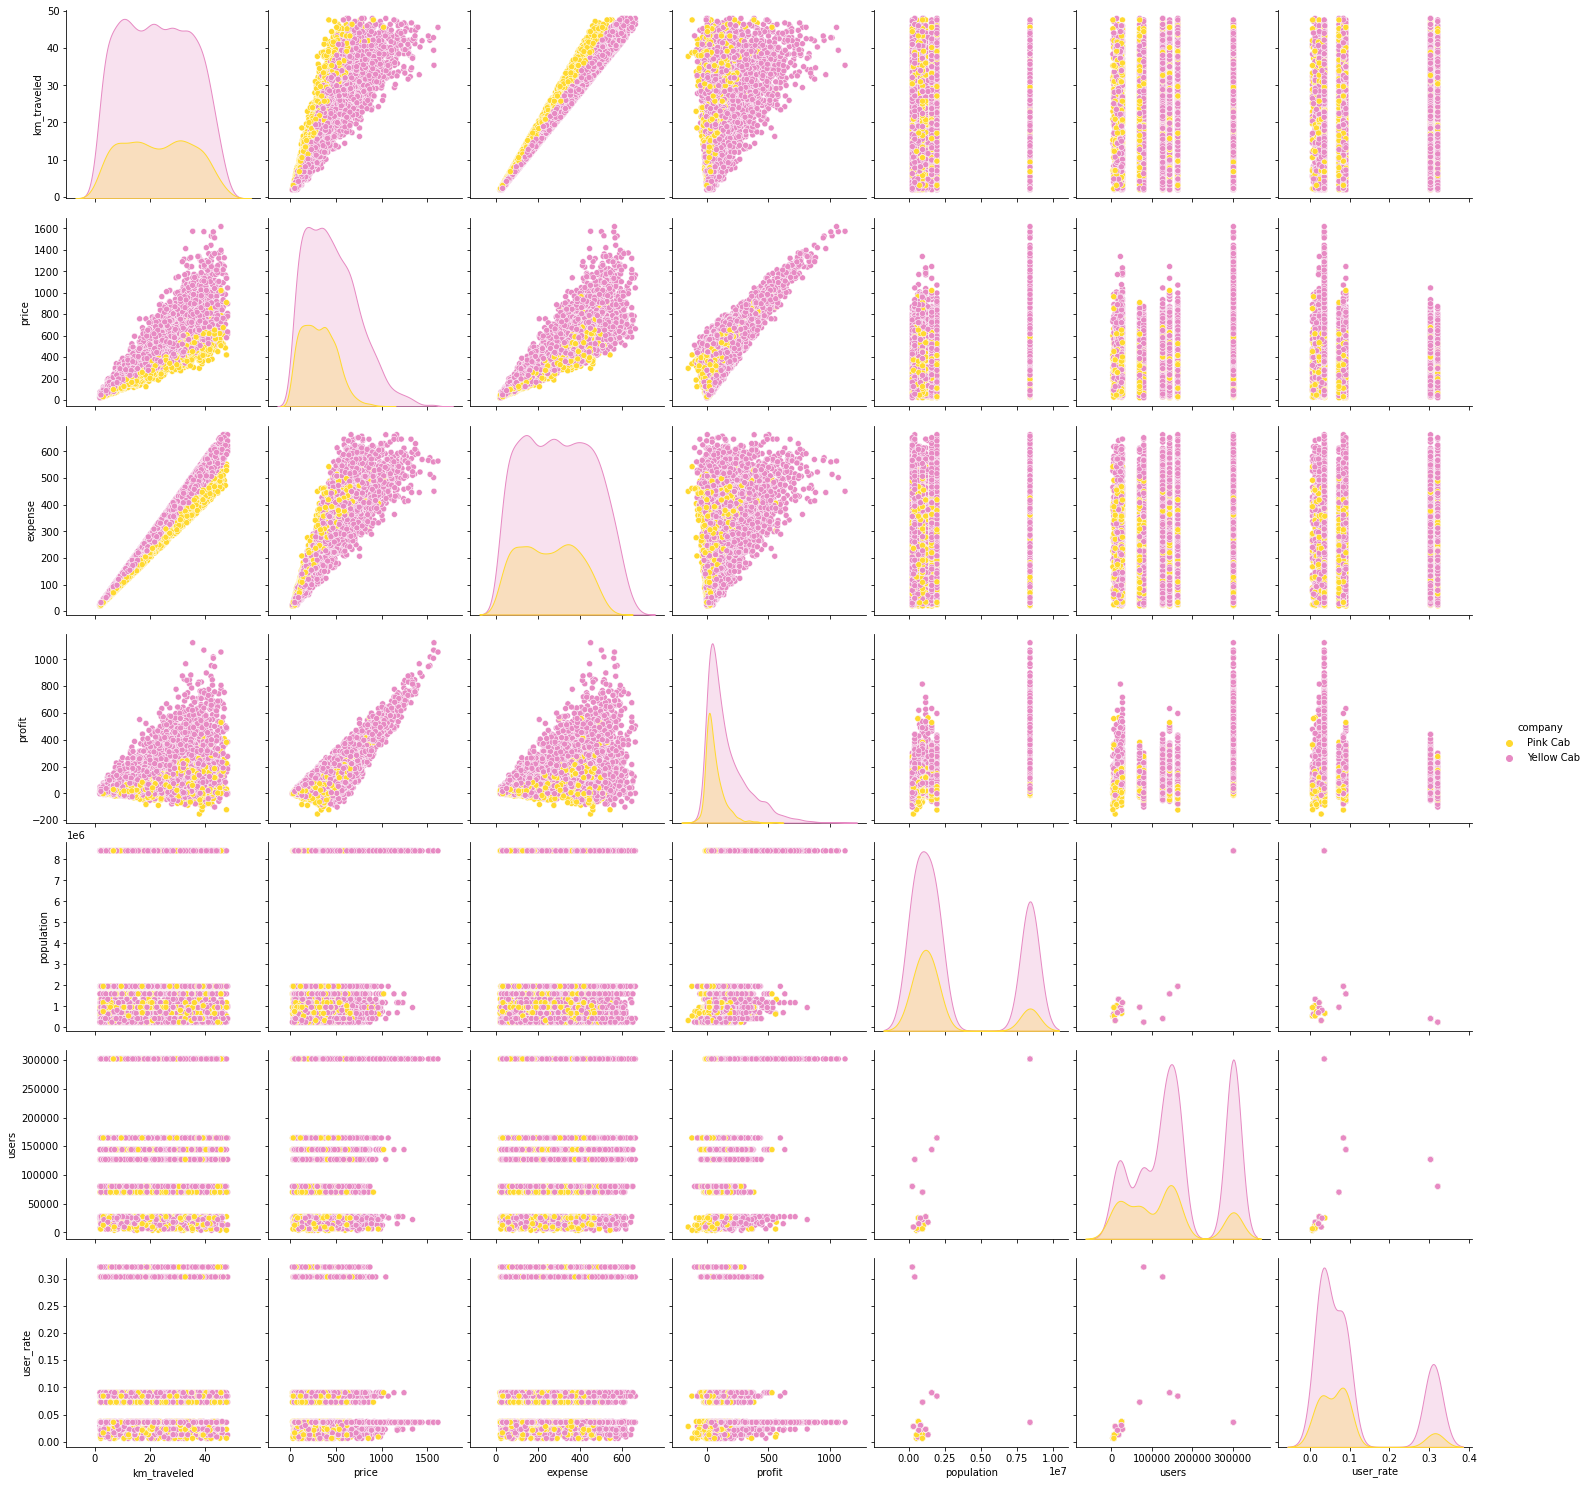

In [47]:
sns.pairplot(df[['company', 'km_traveled', 'price', 'expense', 'profit', 'population', 'users', 'user_rate']].sample(5000), hue='company', palette = {pink_color, yellow_color}, height=3);

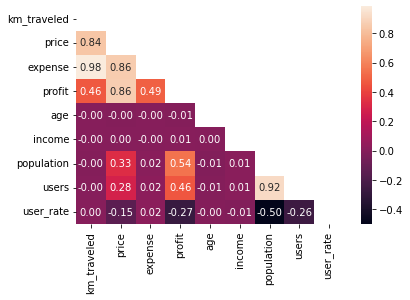

In [48]:
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f',);

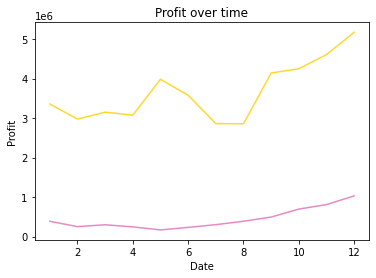

In [49]:
# Let's look at profit over time

df[df['company'] == 'Yellow Cab'].groupby(df.date.dt.month).profit.sum().plot(kind='line', title='Profit over time', xlabel='Date', ylabel='Profit', color=yellow_color);
df[df['company'] == 'Pink Cab'].groupby(df.date.dt.month).profit.sum().plot(kind='line', title='Profit over time', xlabel='Date', ylabel='Profit', color=pink_color);


In [50]:
# Let's look operating locations over time

np.round(df.pivot_table(index=[df.date.dt.year, df.date.dt.year] \
     , columns=['city', 'company'], values='transaction_id', aggfunc='count').pct_change(), 2).mean()

# np.round(df.pivot_table(index=['city'] \
#     , columns=[df.date.dt.year, 'company'], values='transaction_id', aggfunc='count').pct_change(2, axis=1), 2)

city            company   
ATLANTA GA      Pink Cab      0.085
                Yellow Cab    0.085
AUSTIN TX       Pink Cab      0.105
                Yellow Cab    0.060
BOSTON MA       Pink Cab      0.085
                Yellow Cab    0.065
CHICAGO IL      Pink Cab      0.085
                Yellow Cab    0.085
DALLAS TX       Pink Cab      0.080
                Yellow Cab    0.090
DENVER CO       Pink Cab      0.105
                Yellow Cab    0.100
LOS ANGELES CA  Pink Cab      0.085
                Yellow Cab    0.070
MIAMI FL        Pink Cab      0.080
                Yellow Cab    0.110
NASHVILLE TN    Pink Cab      0.085
                Yellow Cab    0.085
NEW YORK NY     Pink Cab      0.100
                Yellow Cab    0.075
ORANGE COUNTY   Pink Cab      0.105
                Yellow Cab    0.080
PHOENIX AZ      Pink Cab      0.085
                Yellow Cab    0.095
PITTSBURGH PA   Pink Cab      0.060
                Yellow Cab    0.070
SACRAMENTO CA   Pink Cab      0.105
 

***OBSERVATION*** There are some cities in which both companies remain relatively competitive (less than 2% difference of growth/reduction) and others where one company is outpacing the other.  Let's dig into that more later

In [51]:
df.pivot_table(index=['city'] \
    , columns=[df.date.dt.year, 'company'], values='transaction_id', aggfunc='count')

date               2016                2017                2018           
company        Pink Cab Yellow Cab Pink Cab Yellow Cab Pink Cab Yellow Cab
city                                                                      
ATLANTA GA          524       1713      632       2079      606       2003
AUSTIN TX           541        929      677       1058      650       1041
BOSTON MA          1529       7378     1883       8878     1774       8250
CHICAGO IL         2783      13998     3317      16954     3261      16312
DALLAS TX           413       1662      485       2032      482       1943
DENVER CO           409        712      493        870      492        849
LOS ANGELES CA     5896       8568     7111       9920     6858       9680
MIAMI FL            601       1283      709       1607      692       1562
NASHVILLE TN        549        345      653        422      639        402
NEW YORK NY        4062      25582     5078      31061     4827      29275
ORANGE COUNTY       438        737      551        880      524        852
PHOENIX AZ          257        351      308        437      299        412
PITTSBURGH PA       209        193      239        218      234        220
SACRAMENTO CA       389        309      472        362      473        362
SAN DIEGO CA       3171       2936     3826       3469     3675       3411
SEATTLE WA          845       1601      938       1862      949       1802
SILICON VALLEY     1136       1421     1349       1646     1312       1655
TUCSON AZ           235        334      285        402      279        396
WASHINGTON DC      1093      12187     1315      14032     1284      13826

***OBSERVATION***
Yellow cab is more volatile than pink

In [52]:
df.groupby('company').payment_mode.value_counts(normalize=True)*100

company     payment_mode
Pink Cab    Card            59.872980
            Cash            40.127020
Yellow Cab  Card            59.991408
            Cash            40.008592
Name: payment_mode, dtype: float64

In [53]:
#df.groupby([df.date.dt.year, 'company']).profit.sum()

pivot = df.groupby([df.date.dt.year, 'company']).profit.sum()
pivot.loc[:, 'Pink Cab']/ pivot.loc[:, 'Yellow Cab']

date
2016    0.123035
2017    0.122687
2018    0.115419
Name: profit, dtype: float64

In [54]:
# Check Gross Profit Margins by company by year
df.groupby([df.date.dt.year, 'company']).profit.sum()/df.groupby('company').price.sum()

date  company   
2016  Pink Cab      0.065083
      Yellow Cab    0.110660
2017  Pink Cab      0.077242
      Yellow Cab    0.131708
2018  Pink Cab      0.059258
      Yellow Cab    0.107406
dtype: float64

In [55]:
pivot = df.groupby([df.date.dt.year, 'company']).price.sum()
pivot.loc[:, 'Pink Cab']/ pivot.loc[:, 'Yellow Cab']

date
2016    0.205516
2017    0.209054
2018    0.212764
Name: price, dtype: float64

***OBSERVATION***
Despite Pink Cab operating at roughly 20% the price of Yellow Cab, Pink Cab still generates half as much Gross Profit Margin

### Initial Observations
- Yellow Cab Co. is considerably larger than Pink Cab Co.
- There are seasonal trends to profits for both companies
- It's interesting that user_rate (users/population) is weakly, negatively correlated with profit.  Look into profit margin rates between the two companies 

### Hypotheses to test:

#### 1. Does one company have a larger measurable year over year growth?

In [56]:
df.pivot_table(index='date', columns='company', values='profit', aggfunc='sum').pct_change(12)#.plot(kind='line', title='Profit over time', xlabel='Date', ylabel='Profit');

company,Pink Cab,Yellow Cab
date,,
2016-01-02,NaN,NaN
2016-01-03,NaN,NaN
2016-01-04,NaN,NaN
2016-01-05,NaN,NaN
2016-01-06,NaN,NaN
...,...,...
2018-12-27,-0.805511,-0.768931
2018-12-28,2.553715,2.331245
2018-12-29,4.281061,2.978370


In [57]:
pd.pivot_table(df,index=df['date'].dt.month, columns= ['company', df['date'].dt.year],
               values='profit',aggfunc='sum')

company    Pink Cab                            Yellow Cab                \
date           2016        2017        2018          2016          2017   
date                                                                      
1         73952.863  149917.004  164184.735  8.363081e+05  1.261753e+06   
2         87475.544   91900.701   72665.064  1.009169e+06  1.097925e+06   
3         87801.183  117105.300   94190.088  9.147648e+05  1.243013e+06   
4         82591.853   91987.847   71238.395  9.461364e+05  1.220955e+06   
5         61550.958   63429.024   43633.932  1.282773e+06  1.497737e+06   
6         71103.252  101300.478   60311.503  1.250892e+06  1.205511e+06   
7        105912.738  117348.380   78623.979  1.024755e+06  1.040901e+06   
8        131573.364  142924.014  113753.922  8.501200e+05  1.119152e+06   
9        143889.421  205922.965  144622.939  1.322873e+06  1.600706e+06   
10       240114.858  264328.239  191993.974  1.373259e+06  1.603497e+06   
11       285591.891  285396.550  239337.731  1.440007e+06  1.752381e+06   
12       341953.299  402094.406  285605.927  1.675938e+06  1.932446e+06   

company                
date             2018  
date                   
1        1.260374e+06  
2        8.688848e+05  
3        9.934367e+05  
4        9.084510e+05  
5        1.203033e+06  
6        1.123935e+06  
7        7.959062e+05  
8        8.869987e+05  
9        1.218804e+06  
10       1.273756e+06  
11       1.416933e+06  
12       1.566886e+06

In [58]:
pd.pivot_table(df,index=df['date'].dt.month, columns= ['company', df['date'].dt.year],
               values='profit',aggfunc='sum').pct_change()

company  Pink Cab                     Yellow Cab                    
date         2016      2017      2018       2016      2017      2018
date                                                                
1             NaN       NaN       NaN        NaN       NaN       NaN
2        0.182855 -0.386989 -0.557419   0.206695 -0.129842 -0.310614
3        0.003723  0.274259  0.296222  -0.093547  0.132148  0.143347
4       -0.059331 -0.214486 -0.243674   0.034295 -0.017746 -0.085547
5       -0.254758 -0.310463 -0.387494   0.355802  0.226693  0.324268
6        0.155193  0.597068  0.382216  -0.024854 -0.195111 -0.065749
7        0.489563  0.158419  0.303632  -0.180781 -0.136549 -0.291857
8        0.242281  0.217946  0.446810  -0.170416  0.075177  0.114451
9        0.093606  0.440786  0.271367   0.556101  0.430284  0.374076
10       0.668746  0.283627  0.327549   0.038088  0.001744  0.045087
11       0.189397  0.079705  0.246590   0.048606  0.092850  0.112405
12       0.197349  0.408897  0.193318   0.163840  0.102755  0.105829

In [59]:
pd.pivot_table(df,index=df['date'].dt.month, columns= ['company', df['date'].dt.year],
               values='profit',aggfunc='sum').pct_change(1, axis =1)

company Pink Cab                     Yellow Cab                    
date        2016      2017      2018       2016      2017      2018
date                                                               
1            NaN  1.027197  0.095171   4.093702  0.508718 -0.001093
2            NaN  0.050587 -0.209309  12.887955  0.087949 -0.208612
3            NaN  0.333755 -0.195680   8.711901  0.358834 -0.200784
4            NaN  0.113764 -0.225567  12.281271  0.290464 -0.255951
5            NaN  0.030512 -0.312083  28.398529  0.167577 -0.196766
6            NaN  0.424695 -0.404628  19.740520 -0.036279 -0.067670
7            NaN  0.107972 -0.329995  12.033618  0.015756 -0.235368
8            NaN  0.086269 -0.204095   6.473324  0.316464 -0.207437
9            NaN  0.431120 -0.297684   8.147046  0.210023 -0.238583
10           NaN  0.100841 -0.273653   6.152614  0.167658 -0.205638
11           NaN -0.000684 -0.161385   5.016632  0.216925 -0.191424
12           NaN  0.175875 -0.289704   4.868009  0.153054 -0.189170

In [60]:
pd.pivot_table(df,index=df['date'].dt.month, columns= ['company', df['date'].dt.year],
               values='profit',aggfunc='sum').pct_change().mean()

company     date
Pink Cab    2016    0.173511
            2017    0.140797
            2018    0.116283
Yellow Cab  2016    0.084894
            2017    0.052946
            2018    0.042336
dtype: float64

In [61]:
# df.pivot_table(index='date', columns='company', values='profit', aggfunc='sum').pct_change(12).mean()
pd.pivot_table(df,index=df['date'].dt.month,columns= ['company',df['date'].dt.year],
               values='profit',aggfunc='sum').mean()

company     date
Pink Cab    2016    1.427926e+05
            2017    1.694712e+05
            2018    1.300135e+05
Yellow Cab  2016    1.160583e+06
            2017    1.381331e+06
            2018    1.126450e+06
dtype: float64

#### 2. Do both companies cost the same to operate (per km, controlled for city)?

First, lets add a couple calculations to the dataframe

In [62]:
df['price_per_km'] = df.price/df.km_traveled
df['expense_per_km'] = df.expense/df.km_traveled
df['profit_per_km'] = df.profit/df.km_traveled

print(f"Price per km: {df.groupby('company').price_per_km.mean()}")
print('------------------------')
print(f"Expense per km: {df.groupby('company').expense_per_km.mean()}")
print('------------------------')
print(f"Profit per km: {df.groupby('company').profit_per_km.mean()}")

Price per km: company
Pink Cab      13.768510
Yellow Cab    20.306073
Name: price_per_km, dtype: float64
------------------------
Expense per km: company
Pink Cab      10.998602
Yellow Cab    13.200565
Name: expense_per_km, dtype: float64
------------------------
Profit per km: company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: profit_per_km, dtype: float64


In [63]:
print(df.groupby('company').expense_per_km.mean())

company
Pink Cab      10.998602
Yellow Cab    13.200565
Name: expense_per_km, dtype: float64


In [64]:
np.round(df.pivot_table(index='city', columns=[df['date'].dt.year, 'company'], values=['price_per_km', 'expense_per_km','profit_per_km'], aggfunc='mean'), 2)

expense_per_km                                          \
date                     2016                2017                2018   
company              Pink Cab Yellow Cab Pink Cab Yellow Cab Pink Cab   
city                                                                    
ATLANTA GA              10.96      13.19    10.95      13.22    11.07   
AUSTIN TX               11.01      13.21    11.00      13.21    11.00   
BOSTON MA               10.99      13.21    11.00      13.22    11.01   
CHICAGO IL              11.00      13.20    11.00      13.20    10.99   
DALLAS TX               10.99      13.21    11.00      13.19    10.97   
DENVER CO               10.97      13.20    10.99      13.22    11.00   
LOS ANGELES CA          10.98      13.20    11.00      13.20    11.01   
MIAMI FL                11.01      13.21    10.99      13.23    10.99   
NASHVILLE TN            10.96      13.20    10.96      13.25    10.98   
NEW YORK NY             10.99      13.20    11.00      13.20    11.00   
ORANGE COUNTY           11.03      13.19    11.04      13.16    10.99   
PHOENIX AZ              11.03      13.17    11.00      13.21    10.97   
PITTSBURGH PA           11.02      13.17    10.99      13.18    10.99   
SACRAMENTO CA           10.99      13.21    11.03      13.13    11.00   
SAN DIEGO CA            11.00      13.21    10.99      13.20    11.01   
SEATTLE WA              11.04      13.19    10.99      13.20    11.02   
SILICON VALLEY          10.98      13.23    11.01      13.22    11.02   
TUCSON AZ               10.98      13.24    11.08      13.22    10.98   
WASHINGTON DC           10.98      13.20    11.02      13.20    11.00   

                          price_per_km                                 \
date                              2016                2017              
company        Yellow Cab     Pink Cab Yellow Cab Pink Cab Yellow Cab   
city                                                                    
ATLANTA GA          13.17        14.02      19.20    13.31      19.27   
AUSTIN TX           13.18        14.63      19.27    14.98      18.82   
BOSTON MA           13.20        13.72      16.17    13.23      16.46   
CHICAGO IL          13.19        12.80      16.64    12.55      16.25   
DALLAS TX           13.18        12.01      22.44    12.00      21.99   
DENVER CO           13.19        12.52      19.87    12.44      20.29   
LOS ANGELES CA      13.20        13.83      18.92    13.61      18.50   
MIAMI FL            13.21        14.84      19.38    14.80      19.31   
NASHVILLE TN        13.16        12.52      16.82    12.74      16.62   
NEW YORK NY         13.20        15.98      27.52    16.26      27.22   
ORANGE COUNTY       13.22        13.99      19.87    14.40      19.98   
PHOENIX AZ          13.21        13.45      19.49    12.80      19.24   
PITTSBURGH PA       13.06        12.10      17.35    12.23      18.62   
SACRAMENTO CA       13.22        12.88      16.15    13.22      15.91   
SAN DIEGO CA        13.20        13.83      17.31    13.88      18.08   
SEATTLE WA          13.15        13.15      17.33    12.88      17.96   
SILICON VALLEY      13.19        15.19      22.85    14.96      22.62   
TUCSON AZ           13.22        14.92      16.36    14.09      16.67   
WASHINGTON DC       13.20        13.35      16.76    13.48      17.49   

                                   profit_per_km                      \
date               2018                     2016                2017   
company        Pink Cab Yellow Cab      Pink Cab Yellow Cab Pink Cab   
city                                                                   
ATLANTA GA        12.99      18.51          3.06       6.01     2.36   
AUSTIN TX         14.18      18.27          3.63       6.06     3.98   
BOSTON MA         12.81      15.16          2.74       2.96     2.23   
CHICAGO IL        12.20      15.37          1.80       3.43     1.55   
DALLAS TX         11.45      21.20          1.01       9.23     1.01   
DENVER 

In [65]:
pink_data = df[df['company'] == 'Pink Cab'].expense_per_km
yellow_data = df[df['company'] == 'Yellow Cab'].expense_per_km

print(f'Expense per KM\nPink: {np.mean(pink_data)}, Yellow: {np.mean(yellow_data)}')

scipy.stats.ttest_ind(pink_data, yellow_data)


Expense per KM
Pink: 10.9986023066663, Yellow: 13.200564873440936


Ttest_indResult(statistic=-799.9065258746834, pvalue=0.0)

In [66]:
pink_data = df[df['company'] == 'Pink Cab'].price_per_km
yellow_data = df[df['company'] == 'Yellow Cab'].price_per_km

print(f'Price per KM\nPink: {np.mean(pink_data)}, Yellow: {np.mean(yellow_data)}')

scipy.stats.ttest_ind(pink_data, yellow_data)

Price per KM
Pink: 13.768510007062694, Yellow: 20.3060726817884


Ttest_indResult(statistic=-320.9807762543478, pvalue=0.0)

In [67]:
pink_data = df[df['company'] == 'Pink Cab'].profit_per_km
yellow_data = df[df['company'] == 'Yellow Cab'].profit_per_km

print(f'Profit per KM\nPink: {np.mean(pink_data)}, Yellow: {np.mean(yellow_data)}')

scipy.stats.ttest_ind(pink_data, yellow_data)

Profit per KM
Pink: 2.7699077003965553, Yellow: 7.10550780835317


Ttest_indResult(statistic=-210.96861574553887, pvalue=0.0)

In [68]:
#df.pivot_table(index='city', columns='company', values=['price', 'expense','profit'], aggfunc='mean')
100 * np.round(df.pivot_table(index='city', columns=[df['date'].dt.year, 'company'], values='price_per_km', aggfunc='mean').pct_change(2, axis =1), 2)

date               2016                2017                2018           
company        Pink Cab Yellow Cab Pink Cab Yellow Cab Pink Cab Yellow Cab
city                                                                      
ATLANTA GA          NaN        NaN     -5.0        0.0     -2.0       -4.0
AUSTIN TX           NaN        NaN      2.0       -2.0     -5.0       -3.0
BOSTON MA           NaN        NaN     -4.0        2.0     -3.0       -8.0
CHICAGO IL          NaN        NaN     -2.0       -2.0     -3.0       -5.0
DALLAS TX           NaN        NaN     -0.0       -2.0     -5.0       -4.0
DENVER CO           NaN        NaN     -1.0        2.0     -5.0       -6.0
LOS ANGELES CA      NaN        NaN     -2.0       -2.0     -4.0       -4.0
MIAMI FL            NaN        NaN     -0.0       -0.0     -4.0       -3.0
NASHVILLE TN        NaN        NaN      2.0       -1.0     -4.0       -5.0
NEW YORK NY         NaN        NaN      2.0       -1.0     -7.0       -5.0
ORANGE COUNTY       NaN        NaN      3.0        1.0     -5.0       -5.0
PHOENIX AZ          NaN        NaN     -5.0       -1.0     -2.0       -4.0
PITTSBURGH PA       NaN        NaN      1.0        7.0     -3.0       -7.0
SACRAMENTO CA       NaN        NaN      3.0       -1.0     -6.0       -3.0
SAN DIEGO CA        NaN        NaN      0.0        4.0     -5.0       -5.0
SEATTLE WA          NaN        NaN     -2.0        4.0     -3.0       -7.0
SILICON VALLEY      NaN        NaN     -2.0       -1.0     -2.0       -5.0
TUCSON AZ           NaN        NaN     -6.0        2.0     -1.0       -3.0
WASHINGTON DC       NaN        NaN      1.0        4.0     -3.0       -7.0

In [69]:
100 * np.round(df.pivot_table(index='city', columns=[df['date'].dt.year, 'company'], values=['expense_per_km'], aggfunc='mean').pct_change(2, axis =1), 2)

expense_per_km                                          \
date                     2016                2017                2018   
company              Pink Cab Yellow Cab Pink Cab Yellow Cab Pink Cab   
city                                                                    
ATLANTA GA                NaN        NaN     -0.0        0.0      1.0   
AUSTIN TX                 NaN        NaN     -0.0       -0.0      0.0   
BOSTON MA                 NaN        NaN      0.0        0.0      0.0   
CHICAGO IL                NaN        NaN      0.0        0.0     -0.0   
DALLAS TX                 NaN        NaN      0.0       -0.0     -0.0   
DENVER CO                 NaN        NaN      0.0        0.0      0.0   
LOS ANGELES CA            NaN        NaN      0.0       -0.0      0.0   
MIAMI FL                  NaN        NaN     -0.0        0.0      0.0   
NASHVILLE TN              NaN        NaN     -0.0        0.0      0.0   
NEW YORK NY               NaN        NaN      0.0        0.0      0.0   
ORANGE COUNTY             NaN        NaN      0.0       -0.0     -0.0   
PHOENIX AZ                NaN        NaN     -0.0        0.0     -0.0   
PITTSBURGH PA             NaN        NaN     -0.0        0.0     -0.0   
SACRAMENTO CA             NaN        NaN      0.0       -1.0     -0.0   
SAN DIEGO CA              NaN        NaN     -0.0       -0.0      0.0   
SEATTLE WA                NaN        NaN     -0.0        0.0      0.0   
SILICON VALLEY            NaN        NaN      0.0       -0.0      0.0   
TUCSON AZ                 NaN        NaN      1.0       -0.0     -1.0   
WASHINGTON DC             NaN        NaN      0.0        0.0     -0.0   

                           
date                       
company        Yellow Cab  
city                       
ATLANTA GA           -0.0  
AUSTIN TX            -0.0  
BOSTON MA            -0.0  
CHICAGO IL           -0.0  
DALLAS TX            -0.0  
DENVER CO            -0.0  
LOS ANGELES CA        0.0  
MIAMI FL             -0.0  
NASHVILLE TN         -1.0  
NEW YORK NY          -0.0  
ORANGE COUNTY         1.0  
PHOENIX AZ           -0.0  
PITTSBURGH PA        -1.0  
SACRAMENTO CA         1.0  
SAN DIEGO CA          0.0  
SEATTLE WA           -0.0  
SILICON VALLEY       -0.0  
TUCSON AZ             0.0  
WASHINGTON DC         0.0

In [70]:
100 * np.round(df.pivot_table(index='city', columns=[df['date'].dt.year, 'company'], values='profit_per_km', aggfunc='mean').pct_change(2, axis =1), 2)

date               2016                2017                2018           
company        Pink Cab Yellow Cab Pink Cab Yellow Cab Pink Cab Yellow Cab
city                                                                      
ATLANTA GA          NaN        NaN    -23.0        1.0    -19.0      -12.0
AUSTIN TX           NaN        NaN     10.0       -7.0    -20.0       -9.0
BOSTON MA           NaN        NaN    -19.0        9.0    -19.0      -40.0
CHICAGO IL          NaN        NaN    -14.0      -11.0    -22.0      -29.0
DALLAS TX           NaN        NaN     -1.0       -5.0    -52.0       -9.0
DENVER CO           NaN        NaN     -6.0        6.0    -40.0      -17.0
LOS ANGELES CA      NaN        NaN     -8.0       -7.0    -20.0      -16.0
MIAMI FL            NaN        NaN     -1.0       -1.0    -16.0      -11.0
NASHVILLE TN        NaN        NaN     14.0       -7.0    -32.0      -21.0
NEW YORK NY         NaN        NaN      5.0       -2.0    -21.0       -9.0
ORANGE COUNTY       NaN        NaN     13.0        2.0    -20.0      -14.0
PHOENIX AZ          NaN        NaN    -25.0       -4.0    -15.0      -14.0
PITTSBURGH PA       NaN        NaN     15.0       30.0    -30.0      -23.0
SACRAMENTO CA       NaN        NaN     16.0       -5.0    -37.0      -22.0
SAN DIEGO CA        NaN        NaN      2.0       19.0    -23.0      -20.0
SEATTLE WA          NaN        NaN    -11.0       15.0    -20.0      -27.0
SILICON VALLEY      NaN        NaN     -6.0       -2.0     -9.0      -13.0
TUCSON AZ           NaN        NaN    -24.0       11.0     -2.0      -16.0
WASHINGTON DC       NaN        NaN      4.0       20.0    -15.0      -29.0

#### 4. How much does population effect profit?

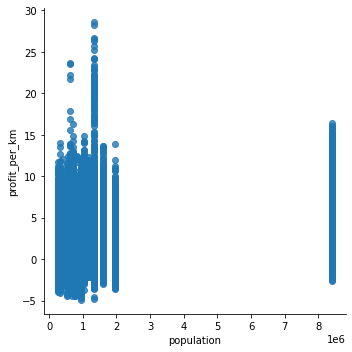

In [71]:
#sns.scatter(df.population, df.profit_per_km, color = df.company, alpha=0.5)
sns.lmplot( x="population", y="profit_per_km", data=df[df['company']=='Pink Cab'], fit_reg=False, legend=True)

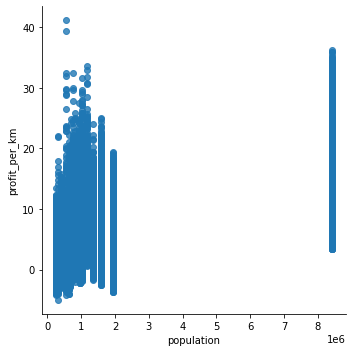

In [72]:
sns.lmplot( x="population", y="profit_per_km", data=df[df['company']=='Yellow Cab'], fit_reg=False, legend=True)

#### 5. Does one company have a higher user rate in each city?

In [73]:
def find_competitive_cities(df):
     # For each city, calculate the average growth rate for the span of the data
     growth_rates_by_city = np.round(df.pivot_table(index=[df.date.dt.year, df.date.dt.year] \
          , columns=['city', 'company'], values='transaction_id', aggfunc='count').pct_change(), 2).mean()

     # then create three lists,
     competitive_cities = []
     yellow_cab_cities = []
     pink_cab_cities = []

     for city in df.city.unique():
          # one for which companies are relatively competitive in each city (within 2%)
          if abs(growth_rates_by_city.loc[city, 'Pink Cab'] - growth_rates_by_city.loc[city, 'Yellow Cab']) <= 0.02:
               competitive_cities.append(city)

          # then one for each company which the company is more competitive then then other
          elif growth_rates_by_city.loc[city, 'Pink Cab'] > growth_rates_by_city.loc[city, 'Yellow Cab']:
               pink_cab_cities.append(city)
          elif growth_rates_by_city.loc[city, 'Pink Cab'] < growth_rates_by_city.loc[city, 'Yellow Cab']:
               yellow_cab_cities.append(city)

     print(f"Competitive Cities: {competitive_cities}")
     print('------------------------')
     print(f"Pink Cab Cities: {pink_cab_cities}")
     print('------------------------')
     print(f"Yellow Cab Cities: {yellow_cab_cities}")

find_competitive_cities(df)

Competitive Cities: ['ATLANTA GA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'NASHVILLE TN', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ']
------------------------
Pink Cab Cities: ['AUSTIN TX', 'BOSTON MA', 'NEW YORK NY', 'ORANGE COUNTY', 'WASHINGTON DC']
------------------------
Yellow Cab Cities: ['MIAMI FL']


#### 6. Is one company growing/expanding faster than the other?

First, let's look at volume of rides (number of transactions)

In [74]:
100 * np.round(df.pivot_table(index=[df['date'].dt.year, df['date'].dt.quarter], columns=['company'], values='transaction_id', aggfunc='count').pct_change(1), 2)

company    Pink Cab  Yellow Cab
date date                      
2016 1          NaN         NaN
     2         41.0        26.0
     3         60.0        29.0
     4         39.0        37.0
2017 1        -56.0       -40.0
     2         19.0         8.0
     3         64.0        32.0
     4         38.0        35.0
2018 1        -58.0       -46.0
     2          1.0        -3.0
     3         59.0        31.0
     4         38.0        35.0

***Observations Not only does Pink Cab outpace (growth) Yellow in 9 of 14 quarters, there is also a noteable increase (~60%) each third quarter for Pink.  This doubles Yellow's growth.***

Now, let's look at unique users per quarter

In [75]:
100 * np.round(df.pivot_table(index=[df['date'].dt.year, df['date'].dt.quarter], columns=['company'], values='customer_id', aggfunc=pd.Series.nunique).pct_change(1), 2)

company    Pink Cab  Yellow Cab
date date                      
2016 1          NaN         NaN
     2         36.0        18.0
     3         53.0        18.0
     4         33.0        20.0
2017 1        -51.0       -27.0
     2         17.0         7.0
     3         53.0        19.0
     4         30.0        16.0
2018 1        -52.0       -29.0
     2          1.0        -2.0
     3         50.0        20.0
     4         32.0        16.0

Largely the same numbers.  

#### 7. Does one company have more active users than the other?

In [76]:
#First, let's create a list of all unique users for both companies

pink_users = df[df['company'] == 'Pink Cab'].customer_id.unique()
yellow_users = df[df['company'] == 'Yellow Cab'].customer_id.unique()

print(f'TOTAL\nPink: {len(pink_users)}, Yellow: {len(yellow_users)}')

# Next, find the number of users who used each company in the last 6 months of the data
recent_pink_users = df[(df['company'] == 'Pink Cab') & (df['date'] > '2018-08-01')].customer_id.unique()
recent_yellow_users = df[(df['company'] == 'Yellow Cab') & (df['date'] > '2018-08-01')].customer_id.unique()

print(f'RECENT\nPink: {len(recent_pink_users)}, Yellow: {len(recent_yellow_users)}')


TOTAL
Pink: 32330, Yellow: 39896
RECENT
Pink: 12667, Yellow: 21099


Yellow outperforms Pink with recent ridership, with nearly 50% of its entire user population over the last three years using it's service in the last 6 months compared to Pink's 33%.

In [77]:
# calculate the number of Yellow users that also used Pink
yellow_users[np.in1d(yellow_users, pink_users)].shape

(26078,)

In [78]:
# calculate the number of Pink users that also used Yellow
pink_users[np.in1d(pink_users, yellow_users)].shape

(26078,)